In [ ]:
import numpy as np # linear algebra operations
import pandas as pd # used for data preparation
import plotly.express as px #used for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('netflix_titles.csv')

In [ ]:
#shape of dataframe - no of rows and columns
df.shape

(8807, 12)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [ ]:
#checking content - it shows first 5 rows of dataframe
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [ ]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [ ]:
#How many missing values does each column have
print(df.T.apply(lambda x: x.isnull().sum(), axis = 1))

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64


In [ ]:
#Converting Categorical Variables into Category
df[['type', 'director','cast', 'rating', 'listed_in', 'country']] = df[['type', 'director','cast', 'rating', 'listed_in', 'country']].astype('category')

###Non-Graphical Analysis for Categorical Variables (Value Counts and Unique Attributes)

In [ ]:
print("Value counts for 'type':")
print(df['type'].value_counts())

print("\nUnique values in 'type':")
print(df['type'].unique())

print("\nUnique count of 'type':")
print(df['type'].nunique())

Value counts for 'type':
type
Movie      6131
TV Show    2676
Name: count, dtype: int64

Unique values in 'type':
['Movie', 'TV Show']
Categories (2, object): ['Movie', 'TV Show']

Unique count of 'type':
2


In [ ]:
print("\nValue counts for 'rating':")
print(df['rating'].value_counts())

print("\nUnique values in 'rating':")
print(df['rating'].unique())

print("\nUnique count of 'rating':")
print(df['rating'].nunique())


Value counts for 'rating':
rating
TV-MA       3207
TV-14       2160
TV-PG        863
R            799
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            80
G             41
TV-Y7-FV       6
UR             3
NC-17          3
74 min         1
84 min         1
66 min         1
Name: count, dtype: int64

Unique values in 'rating':
['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', ..., '66 min', 'NR', NaN, 'TV-Y7-FV', 'UR']
Length: 18
Categories (17, object): ['66 min', '74 min', '84 min', 'G', ..., 'TV-Y', 'TV-Y7', 'TV-Y7-FV', 'UR']

Unique count of 'rating':
17


In [ ]:
print("\nValue counts for 'country':")
print(df['country'].value_counts())

print("\nUnique values in 'country':")
print(df['country'].unique())

print("\nUnique count of 'country':")
print(df['country'].nunique())


Value counts for 'country':
country
United States                                                                          2818
India                                                                                   972
United Kingdom                                                                          419
Japan                                                                                   245
South Korea                                                                             199
                                                                                       ... 
Ireland, Canada, Luxembourg, United States, United Kingdom, Philippines, India            1
Ireland, Canada, United Kingdom, United States                                            1
Ireland, Canada, United States, United Kingdom                                            1
Ireland, France, Iceland, United States, Mexico, Belgium, United Kingdom, Hong Kong       1
Zimbabwe                                   

In [ ]:
print("\nValue counts for 'director':")
print(df['director'].value_counts())

print("\nUnique values in 'director':")
print(df['director'].unique())

print("\nUnique count of 'director':")
print(df['director'].nunique())


Value counts for 'director':
director
Rajiv Chilaka                            19
Raúl Campos, Jan Suter                   18
Suhas Kadav                              16
Marcus Raboy                             16
Jay Karas                                14
                                         ..
Jos Humphrey                              1
Jose Gomez                                1
Jose Javier Reyes                         1
Joseduardo Giordano, Sergio Goyri Jr.     1
Khaled Youssef                            1
Name: count, Length: 4528, dtype: int64

Unique values in 'director':
['Kirsten Johnson', NaN, 'Julien Leclercq', 'Mike Flanagan', 'Robert Cullen, José Luis Ucha', ..., 'Mu Chu', 'Chandra Prakash Dwivedi', 'Majid Al Ansari', 'Peter Hewitt', 'Mozez Singh']
Length: 4529
Categories (4528, object): ['A. L. Vijay', 'A. Raajdheep', 'A. Salaam', 'A.R. Murugadoss', ...,
                            'Ísold Uggadóttir', 'Óskar Thór Axelsson', 'Ömer Faruk Sorak',
                     

In [ ]:
print("\nValue counts for 'cast':")
print(df['cast'].value_counts())

print("\nUnique values in 'cast':")
print(df['cast'].unique())

print("\nUnique count of 'cast':")
print(df['cast'].nunique())


Value counts for 'cast':
cast
David Attenborough                                                                                                                                                                                                                                     19
Vatsal Dubey, Julie Tejwani, Rupa Bhimani, Jigna Bhardwaj, Rajesh Kava, Mousam, Swapnil                                                                                                                                                                14
Samuel West                                                                                                                                                                                                                                            10
Jeff Dunham                                                                                                                                                                                                                

In [ ]:
print("\nValue counts for 'listed_in(genre)':")
print(df['listed_in'].value_counts())

print("\nUnique values in 'listed_in(genre)':")
print(df['listed_in'].unique())

print("\nUnique count of 'listed_in(genre)':")
print(df['listed_in'].nunique())


Value counts for 'listed_in(genre)':
listed_in
Dramas, International Movies                                  362
Documentaries                                                 359
Stand-Up Comedy                                               334
Comedies, Dramas, International Movies                        274
Dramas, Independent Movies, International Movies              252
                                                             ... 
Cult Movies, Dramas, International Movies                       1
Cult Movies, Dramas, Music & Musicals                           1
Cult Movies, Dramas, Thrillers                                  1
Cult Movies, Horror Movies, Thrillers                           1
Crime TV Shows, TV Action & Adventure, TV Sci-Fi & Fantasy      1
Name: count, Length: 514, dtype: int64

Unique values in 'listed_in(genre)':
['Documentaries', 'International TV Shows, TV Dramas, TV Mysteries', 'Crime TV Shows, International TV Shows, TV Ac..., 'Docuseries, Reality TV', 'In

###Netflix Content by Type

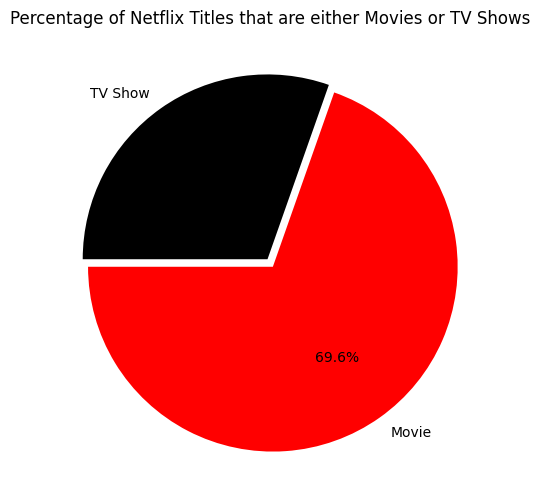

In [ ]:
plt.figure(figsize=(12,6))
plt.title("Percentage of Netflix Titles that are either Movies or TV Shows")

#In the 'type' column, this counts the occurences for each type (Movie and TV Show), and gives the result in the form of a pie chart.
g = plt.pie(df.type.value_counts(),explode=(0.025,0.025), labels=df.type.value_counts().index, colors=['red','black'],autopct='%1.1f%%', startangle=180)
plt.show()

###Distribution of Content Ratings using a pie chart

In [ ]:
x = df.groupby(['rating']).size().reset_index(name='counts')
print(x)

      rating  counts
0     66 min       1
1     74 min       1
2     84 min       1
3          G      41
4      NC-17       3
5         NR      80
6         PG     287
7      PG-13     490
8          R     799
9      TV-14    2160
10      TV-G     220
11     TV-MA    3207
12     TV-PG     863
13      TV-Y     307
14     TV-Y7     334
15  TV-Y7-FV       6
16        UR       3


<ipython-input-16-f6800ae2195b>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  x = df.groupby(['rating']).size().reset_index(name='counts')


In [ ]:
pieChart = px.pie(x, values='counts', names='rating', title='Distribution of content ratings on Netflix')
pieChart.show()

###Analysing Top Directors on Netflix

In [ ]:
# Checking if 'Director not specified' is already a category, if not add the new category
if 'Director not specified' not in df['director'].cat.categories:
    df['director'] = df['director'].cat.add_categories('Director not specified')

df['director']=df['director'].fillna('Director not specified') #replacing missing values in Director column
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,Director not specified,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,Director not specified,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,Director not specified,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [ ]:
directors_list = pd.DataFrame()
print(directors_list)
#created an empty dataframe. Need to fill director names in the dataframe

Empty DataFrame
Columns: []
Index: []


In [ ]:
directors_list = df['director'].str.split(',', expand=True).stack() #unnesting director column
print(directors_list)

0     0           Kirsten Johnson
1     0    Director not specified
2     0           Julien Leclercq
3     0    Director not specified
4     0    Director not specified
                    ...          
8802  0             David Fincher
8803  0    Director not specified
8804  0           Ruben Fleischer
8805  0              Peter Hewitt
8806  0               Mozez Singh
Length: 9612, dtype: object


In [ ]:
directors_list = directors_list.to_frame()
print(directors_list)
#dataframe is in the form of rows and columns

                             0
0    0         Kirsten Johnson
1    0  Director not specified
2    0         Julien Leclercq
3    0  Director not specified
4    0  Director not specified
...                        ...
8802 0           David Fincher
8803 0  Director not specified
8804 0         Ruben Fleischer
8805 0            Peter Hewitt
8806 0             Mozez Singh

[9612 rows x 1 columns]


In [ ]:
directors_list.columns = ['Director']
print(directors_list)

                      Director
0    0         Kirsten Johnson
1    0  Director not specified
2    0         Julien Leclercq
3    0  Director not specified
4    0  Director not specified
...                        ...
8802 0           David Fincher
8803 0  Director not specified
8804 0         Ruben Fleischer
8805 0            Peter Hewitt
8806 0             Mozez Singh

[9612 rows x 1 columns]


In [ ]:
directors = directors_list.groupby(['Director']).size().reset_index(name='Total Count')
print(directors)

                       Director  Total Count
0                Aaron Moorhead            2
1                   Aaron Woolf            1
2      Abbas Alibhai Burmawalla            1
3              Abdullah Al Noor            1
4           Abhinav Shiv Tiwari            1
...                         ...          ...
5116                Çagan Irmak            1
5117           Ísold Uggadóttir            1
5118        Óskar Thór Axelsson            1
5119           Ömer Faruk Sorak            2
5120               Şenol Sönmez            2

[5121 rows x 2 columns]


In [ ]:
directors = directors[directors.Director != 'Director not specified'] #removing Director not specified to analyse the data
print(directors)

                       Director  Total Count
0                Aaron Moorhead            2
1                   Aaron Woolf            1
2      Abbas Alibhai Burmawalla            1
3              Abdullah Al Noor            1
4           Abhinav Shiv Tiwari            1
...                         ...          ...
5116                Çagan Irmak            1
5117           Ísold Uggadóttir            1
5118        Óskar Thór Axelsson            1
5119           Ömer Faruk Sorak            2
5120               Şenol Sönmez            2

[5120 rows x 2 columns]


In [ ]:
#sorting the counts
directors = directors.sort_values(by=['Total Count'], ascending = False)
print(directors)

             Director  Total Count
4021    Rajiv Chilaka           22
4068      Raúl Campos           18
261         Jan Suter           18
4652      Suhas Kadav           16
3236     Marcus Raboy           16
...               ...          ...
2341         J. Davis            1
2342  J. Lee Thompson            1
2343  J. Michael Long            1
609    Smriti Keshari            1
2561    Joaquín Mazón            1

[5120 rows x 2 columns]


In [ ]:
#Top 10 directors
top10Directors = directors.head(10)
print(top10Directors)

                 Director  Total Count
4021        Rajiv Chilaka           22
4068          Raúl Campos           18
261             Jan Suter           18
4652          Suhas Kadav           16
3236         Marcus Raboy           16
2451            Jay Karas           15
1382  Cathy Garcia-Molina           13
2448          Jay Chapman           12
3307      Martin Scorsese           12
5075      Youssef Chahine           12


In [ ]:
#To visualize amount of content they have created
barChart = px.bar(top10Directors, x='Total Count', y = 'Director', title = 'Top 10 Directors on Netflix')
barChart.show()

###Top Directors - TV Shows

director
Alastair Fothergill      3
Ken Burns                3
Jung-ah Im               2
Gautham Vasudev Menon    2
Iginio Straffi           2
Hsu Fu-chun              2
Stan Lathan              2
Joe Berlinger            2
Shin Won-ho              2
Lynn Novick              2
Name: count, dtype: int64


<ipython-input-145-8f318bd39983>:17: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.


/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warni

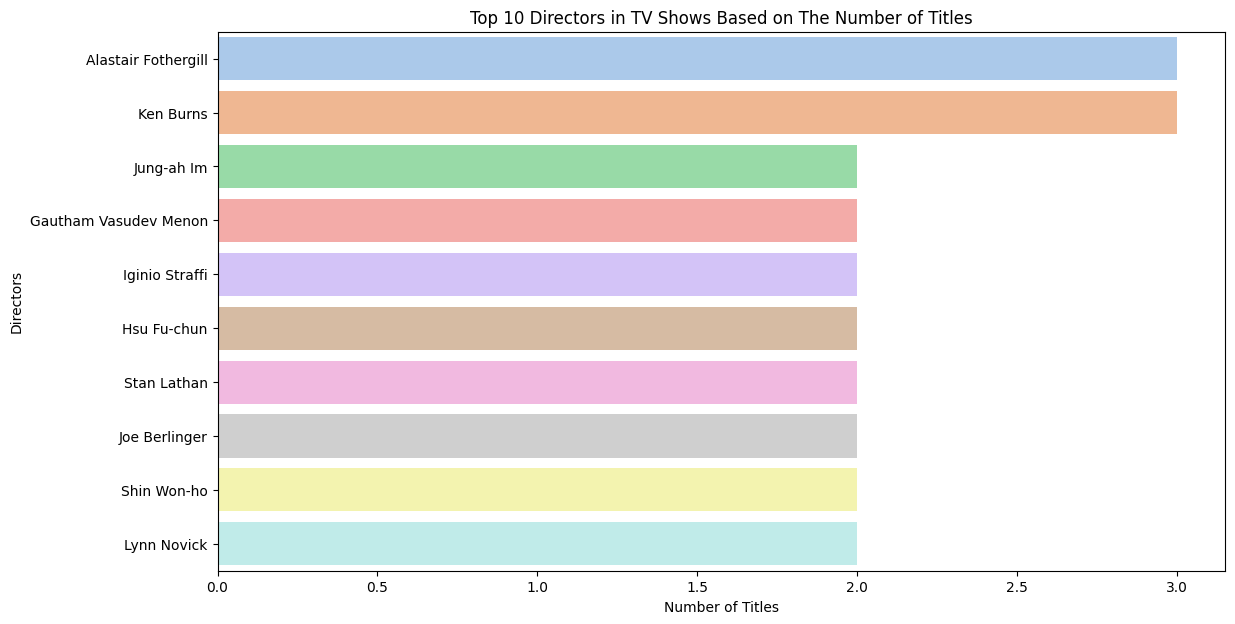

In [ ]:
# Filter for TV Shows
shows_df = df[df.type.str.contains("TV Show")]

# Filter out entries with 'Director not specified'
filtered_shows_directors = shows_df[shows_df.director != 'Director not specified']

# Split the cast and drop NaN values directly into a new Series
shows_director_list = filtered_shows_directors['director'].str.split(', ').explode()

# Count the occurrences of each director
top_directors_shows = shows_director_list.value_counts().head(10)
print(top_directors_shows.head(10))

# Plotting the top directors
plt.figure(figsize=(13, 7))
plt.title('Top 10 Directors in TV Shows Based on The Number of Titles')
sns.barplot(y=top_directors_shows.index, x=top_directors_shows.values, palette='pastel')
plt.xlabel('Number of Titles')
plt.ylabel('Directors')
plt.show()

###Top Directors - Movies

director
Rajiv Chilaka          22
Jan Suter              21
Raúl Campos            19
Suhas Kadav            16
Marcus Raboy           15
Jay Karas              15
Cathy Garcia-Molina    13
Martin Scorsese        12
Youssef Chahine        12
Jay Chapman            12
Name: count, dtype: int64


<ipython-input-29-b983fc55cdff>:17: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.


/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warnin

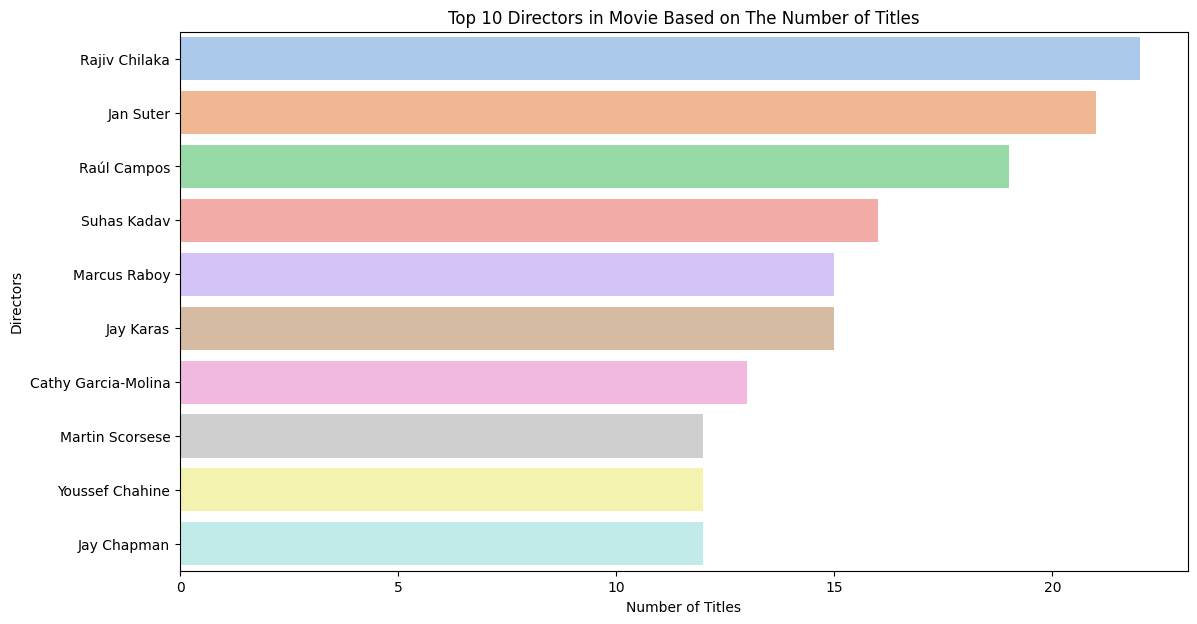

In [ ]:
# Filter for Movie
movies_df = df[df.type.str.contains("Movie")]

# Filter out entries with 'Director not specified'
filtered_movies_directors = movies_df[movies_df.director != 'Director not specified']

# Split the cast and drop NaN values directly into a new Series
movie_director_list = filtered_movies_directors['director'].str.split(', ').explode()

# Count the occurrences of each director
top_movie_directors = movie_director_list.value_counts().head(10)
print(top_movie_directors.head(10))

# Plotting the top directors
plt.figure(figsize=(13, 7))
plt.title('Top 10 Directors in Movie Based on The Number of Titles')
sns.barplot(y=top_movie_directors.index, x=top_movie_directors.values, palette='pastel')
plt.xlabel('Number of Titles')
plt.ylabel('Directors')
plt.show()

###Analysing Top Actors on Netflix

In [ ]:
if 'No cast specified' not in df['cast'].cat.categories:
    df['cast'] = df['cast'].cat.add_categories('No cast specified')

df['cast']=df['cast'].fillna('No cast specified') #replacing missing values
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,No cast specified,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,Director not specified,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,Director not specified,No cast specified,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,Director not specified,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [ ]:
cast_df = pd.DataFrame() #creating a dataframe
print(cast_df)

Empty DataFrame
Columns: []
Index: []


In [ ]:
cast_df = df['cast'].str.split(',',expand=True).stack() #unnesting cast column
print(cast_df)

0     0         No cast specified
1     0                Ama Qamata
      1               Khosi Ngema
      2             Gail Mabalane
      3            Thabang Molaba
                    ...          
8806  3          Manish Chaudhary
      4              Meghna Malik
      5             Malkeet Rauni
      6            Anita Shabdish
      7     Chittaranjan Tripathy
Length: 64951, dtype: object


In [ ]:
cast_df = cast_df.to_frame() #creating a dataframe after unnesting
print(cast_df)

                             0
0    0       No cast specified
1    0              Ama Qamata
     1             Khosi Ngema
     2           Gail Mabalane
     3          Thabang Molaba
...                        ...
8806 3        Manish Chaudhary
     4            Meghna Malik
     5           Malkeet Rauni
     6          Anita Shabdish
     7   Chittaranjan Tripathy

[64951 rows x 1 columns]


In [ ]:
cast_df.columns = ['Actor'] #Giving title 'Actor' for the dataframe column
print(cast_df)

                         Actor
0    0       No cast specified
1    0              Ama Qamata
     1             Khosi Ngema
     2           Gail Mabalane
     3          Thabang Molaba
...                        ...
8806 3        Manish Chaudhary
     4            Meghna Malik
     5           Malkeet Rauni
     6          Anita Shabdish
     7   Chittaranjan Tripathy

[64951 rows x 1 columns]


In [ ]:
actors = cast_df.groupby(['Actor']).size().reset_index(name = 'Total Count') #Checking total count of actor
print(actors)

                        Actor  Total Count
0                         Jr.            2
1       "Riley" Lakdhar Dridi            1
2                'Najite Dede            1
3                    2 Chainz            1
4                        2Mex            1
...                       ...          ...
39292         İbrahim Büyükak            1
39293        İbrahim Çelikkol            1
39294             Şahin Irmak            1
39295          Şükrü Özyıldız            1
39296            Ṣọpẹ́ Dìrísù            1

[39297 rows x 2 columns]


In [ ]:
actors = actors[actors.Actor != 'No cast specified'] #removing 'No cast Specified' to do better analysis
print(actors)

                        Actor  Total Count
0                         Jr.            2
1       "Riley" Lakdhar Dridi            1
2                'Najite Dede            1
3                    2 Chainz            1
4                        2Mex            1
...                       ...          ...
39292         İbrahim Büyükak            1
39293        İbrahim Çelikkol            1
39294             Şahin Irmak            1
39295          Şükrü Özyıldız            1
39296            Ṣọpẹ́ Dìrísù            1

[39296 rows x 2 columns]


In [ ]:
actors = actors.sort_values(by=['Total Count'], ascending=False) #sorting cast in descending order based on total count
print(actors)

                   Actor  Total Count
2612         Anupam Kher           39
26941       Rupa Bhimani           31
30303   Takahiro Sakurai           30
15541      Julie Tejwani           28
23624            Om Puri           27
...                  ...          ...
15290        João Côrtes            1
15289      João Assunção            1
15288     Joziah Lagonoy            1
15287        Jozef Gjura            1
39296       Ṣọpẹ́ Dìrísù            1

[39296 rows x 2 columns]


In [ ]:
top10Actors = actors.head(10) #taking top 10 actors
print(top10Actors)

                   Actor  Total Count
2612         Anupam Kher           39
26941       Rupa Bhimani           31
30303   Takahiro Sakurai           30
15541      Julie Tejwani           28
23624            Om Puri           27
38446     Shah Rukh Khan           26
25410        Rajesh Kava           26
4186         Boman Irani           25
33367          Yuki Kaji           25
1905       Andrea Libman           25


In [ ]:
#bar graph of top 10 actors for better visualisation
barChart2 = px.bar(top10Actors, x='Total Count', y='Actor', title='Top 10 Actors on Netflix')
barChart2.show()

###Top Actors - Movies

cast
Anupam Kher         42
Shah Rukh Khan      35
Naseeruddin Shah    32
Akshay Kumar        30
Om Puri             30
Amitabh Bachchan    28
Julie Tejwani       28
Paresh Rawal        28
Rupa Bhimani        27
Boman Irani         27
Name: count, dtype: int64


<ipython-input-146-db6250ba774e>:18: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.


/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warni

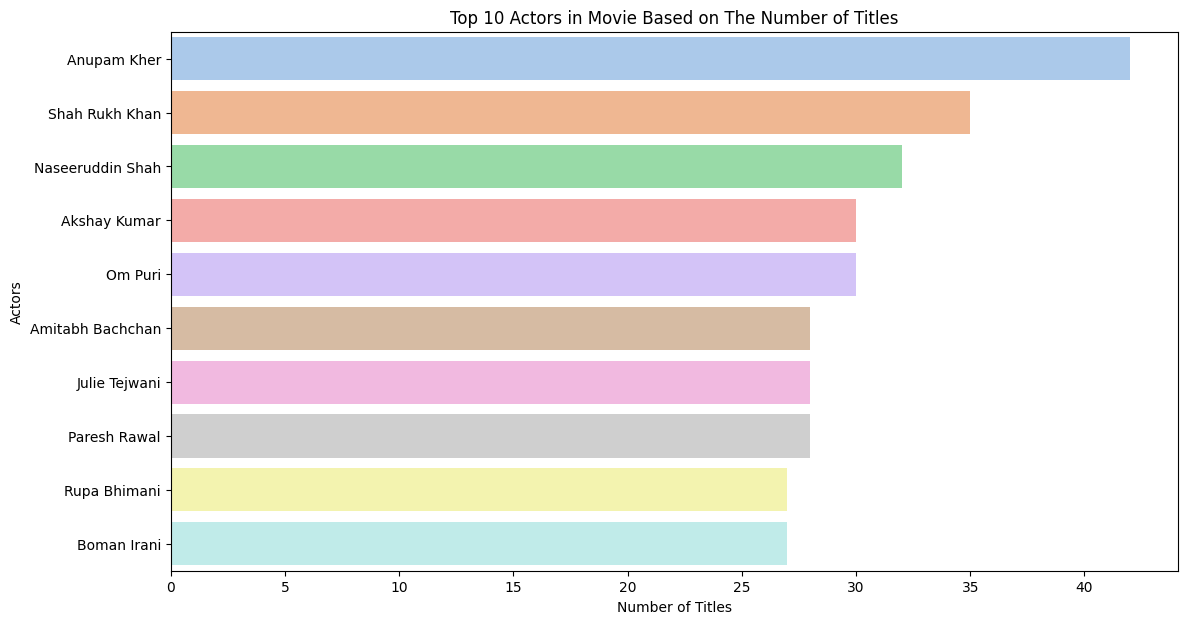

In [ ]:
# Filter for Movie
movies_df = df[df.type.str.contains("Movie")]

# Filter out entries with 'No cast specified'
filtered_movies = movies_df[movies_df.cast != 'No cast specified']

# Split the cast and drop NaN values directly into a new Series
movie_cast_list = filtered_movies['cast'].str.split(', ').explode()

# Count the occurrences of each actor
top_actors_movies = movie_cast_list.value_counts().head(10)

print(top_actors_movies)

# Plotting the top actors
plt.figure(figsize=(13, 7))
plt.title('Top 10 Actors in Movie Based on The Number of Titles')
sns.barplot(y=top_actors_movies.index, x=top_actors_movies.values, palette='pastel')
plt.xlabel('Number of Titles')
plt.ylabel('Actors')
plt.show()


###Top Actors - TV Shows

cast
Takahiro Sakurai      25
Yuki Kaji             19
Daisuke Ono           17
Junichi Suwabe        17
Ai Kayano             17
Yuichi Nakamura       16
Jun Fukuyama          15
Yoshimasa Hosoya      15
David Attenborough    14
Mamoru Miyano         13
Name: count, dtype: int64


<ipython-input-41-fb156a80f635>:18: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.


/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warnin

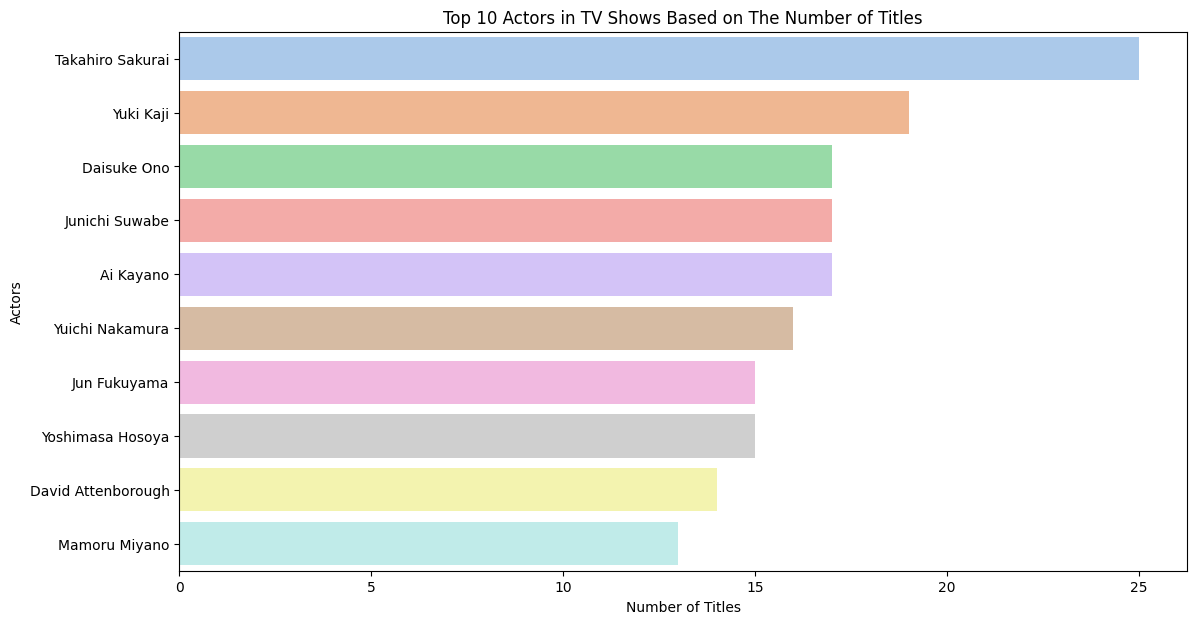

In [ ]:
# Filter for TV Shows
shows_df = df[df.type.str.contains("TV Show")]

# Filter out entries with 'No cast specified'
filtered_cast_shows = shows_df[shows_df.cast != 'No cast specified']

# Split the cast and drop NaN values directly into a new Series
cast_list = filtered_cast_shows['cast'].str.split(', ').explode()

# Count the occurrences of each actor
top_actors_shows = cast_list.value_counts().head(10)

print(top_actors_shows)

# Plotting the top actors
plt.figure(figsize=(13, 7))
plt.title('Top 10 Actors in TV Shows Based on The Number of Titles')
sns.barplot(y=top_actors_shows.index, x=top_actors_shows.values, palette='pastel')
plt.xlabel('Number of Titles')
plt.ylabel('Actors')
plt.show()


###Trend of Shows on Netflix

In [ ]:
df1 = df[['type', 'release_year']]
df1 = df1.rename(columns = {"release_year":"Release Year", "type": "Type"})
df2 = df1.groupby(['Release Year', 'Type']).size().reset_index(name='Total Count')
print(df2)

     Release Year     Type  Total Count
0            1925    Movie            0
1            1925  TV Show            1
2            1942    Movie            2
3            1942  TV Show            0
4            1943    Movie            3
..            ...      ...          ...
143          2019  TV Show          397
144          2020    Movie          517
145          2020  TV Show          436
146          2021    Movie          277
147          2021  TV Show          315

[148 rows x 3 columns]


<ipython-input-42-eef446ad90b1>:3: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



In [ ]:
df2 = df2[df2['Release Year']>=2000]
graph = px.line(df2, x = "Release Year", y="Total Count", color = "Type", title = "Trend of Content Produced on Netfilx Every Year")
graph.show()

###Country-wise Analysis

In [ ]:
#replacing missing values of country
if 'Country not specified' not in df['country'].cat.categories:
    df['country'] = df['country'].cat.add_categories('Country not specified')
df['country'] = df['country'].fillna('Country not specified')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,No cast specified,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,Director not specified,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Country not specified,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,Director not specified,No cast specified,Country not specified,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,Director not specified,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [ ]:
country_list = pd.DataFrame()
print(country_list) #empty dataframe

Empty DataFrame
Columns: []
Index: []


In [ ]:
#unnesting country column
country_list = df['country'].str.split(',', expand = True).stack()
print(country_list)

0     0            United States
1     0             South Africa
2     0    Country not specified
3     0    Country not specified
4     0                    India
                   ...          
8802  0            United States
8803  0    Country not specified
8804  0            United States
8805  0            United States
8806  0                    India
Length: 10850, dtype: object


In [ ]:
country_list = country_list.to_frame()
print(country_list)

                            0
0    0          United States
1    0           South Africa
2    0  Country not specified
3    0  Country not specified
4    0                  India
...                       ...
8802 0          United States
8803 0  Country not specified
8804 0          United States
8805 0          United States
8806 0                  India

[10850 rows x 1 columns]


In [ ]:
country_list.columns = ['Country']
print(country_list)

                      Country
0    0          United States
1    0           South Africa
2    0  Country not specified
3    0  Country not specified
4    0                  India
...                       ...
8802 0          United States
8803 0  Country not specified
8804 0          United States
8805 0          United States
8806 0                  India

[10850 rows x 1 columns]


In [ ]:
#total count of content in each country
country = country_list.groupby(['Country']).size().reset_index(name = 'Total Count')
print(country)

          Country  Total Count
0                            7
1     Afghanistan            1
2         Albania            1
3         Algeria            3
4          Angola            1
..            ...          ...
193       Uruguay            9
194     Venezuela            2
195       Vietnam            7
196  West Germany            1
197      Zimbabwe            1

[198 rows x 2 columns]


In [ ]:
#removing 'Country Not Specified' for better analysis
country = country[country.Country != 'Country not specified']
print(country)

          Country  Total Count
0                            7
1     Afghanistan            1
2         Albania            1
3         Algeria            3
4          Angola            1
..            ...          ...
193       Uruguay            9
194     Venezuela            2
195       Vietnam            7
196  West Germany            1
197      Zimbabwe            1

[197 rows x 2 columns]


In [ ]:
country = country.sort_values(by=['Total Count'], ascending = False)
print(country)

            Country  Total Count
192   United States         3211
142           India         1008
191  United Kingdom          628
106   United States          479
122          Canada          271
..              ...          ...
121        Cameroon            1
57        Lithuania            1
165        Paraguay            1
56    Liechtenstein            1
197        Zimbabwe            1

[197 rows x 2 columns]


In [ ]:
#Top 10 countries
top10Countries = country.head(10)
print(top10Countries)

            Country  Total Count
192   United States         3211
142           India         1008
191  United Kingdom          628
106   United States          479
122          Canada          271
149           Japan          259
133          France          212
180     South Korea          211
34           France          181
182           Spain          181


In [ ]:
#plotting bar graph for top 10 countries
top10Countries = top10Countries.sort_values(by=['Total Count'])
barChart = px.bar(top10Countries, x = 'Total Count', y = 'Country', title = 'Top 10 Countries on Netflix')
barChart.show()

###Top Countries for Movies

In [ ]:
# Filter for Movies
movies_df = df[df.type.str.contains("Movie")]

# Filter out entries with 'Country not specified'
country_movies = movies_df[movies_df.country != 'Country not specified']

# Split the countries and drop NaN values directly into a new Series
country_movie_list = country_movies['country'].str.split(', ').explode()

# Group by country and count occurrences
country_movie_group = country_movie_list.value_counts().reset_index()
country_movie_group.columns = ['Country', 'Total Count']  # Rename columns for clarity

top_10_country_movies = country_movie_group.head(10)
print(top_10_country_movies)


top_10_country_movies = top_10_country_movies.sort_values(by=['Total Count'])  # Sort for better visualization
barChart = px.bar(top_10_country_movies, x='Total Count', y='Country', title='Top 10 Countries on Netflix - Movies', orientation='h')
barChart.show()

          Country  Total Count
0   United States         2751
1           India          962
2  United Kingdom          532
3          Canada          319
4          France          303
5         Germany          182
6           Spain          171
7           Japan          119
8           China          114
9          Mexico          111


###Top Countries - TV Shows

In [ ]:
# Filter for TV Shows
shows_df = df[df.type.str.contains("TV Show")]

# Filter out entries with 'Country not specified'
country_shows = shows_df[shows_df.country != 'Country not specified']

# Split the countries and drop NaN values directly into a new Series
country_show_list = country_shows['country'].str.split(', ').explode()

# Group by country and count occurrences
country_show_group = country_show_list.value_counts().reset_index()
country_show_group.columns = ['Country', 'Total Count']  # Rename columns for clarity

top_10_country_shows = country_show_group.head(10)
print(top_10_country_shows)


top_10_country_movies = top_10_country_shows.sort_values(by=['Total Count'])  # Sort for better visualization
barChart = px.bar(top_10_country_shows, x='Total Count', y='Country', title='Top 10 Countries on Netflix - Shows', orientation='h')
barChart.show()

          Country  Total Count
0   United States          938
1  United Kingdom          272
2           Japan          199
3     South Korea          170
4          Canada          126
5          France           90
6           India           84
7          Taiwan           70
8       Australia           66
9           Spain           61


###Genre based Analysis

In [ ]:
if 'Genre not specified' not in df['listed_in'].cat.categories:
    # Add the new category 'Director not specified'
    df['listed_in'] = df['listed_in'].cat.add_categories('Genre not specified')
df['genre']=df['listed_in'].fillna('Genre not specified')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,genre
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,No cast specified,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",Documentaries
1,s2,TV Show,Blood & Water,Director not specified,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...","International TV Shows, TV Dramas, TV Mysteries"
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Country not specified,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,"Crime TV Shows, International TV Shows, TV Act..."
3,s4,TV Show,Jailbirds New Orleans,Director not specified,No cast specified,Country not specified,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...","Docuseries, Reality TV"
4,s5,TV Show,Kota Factory,Director not specified,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,"International TV Shows, Romantic TV Shows, TV ..."


In [ ]:
genre_list = pd.DataFrame()
print(genre_list)

Empty DataFrame
Columns: []
Index: []


In [ ]:
genre_list = df['listed_in'].str.split(',', expand=True).stack()
print(genre_list)

0     0               Documentaries
1     0      International TV Shows
      1                   TV Dramas
      2                TV Mysteries
2     0              Crime TV Shows
                     ...           
8805  0    Children & Family Movies
      1                    Comedies
8806  0                      Dramas
      1        International Movies
      2            Music & Musicals
Length: 19323, dtype: object


In [ ]:
genre_list = genre_list.to_frame()
print(genre_list)

                               0
0    0             Documentaries
1    0    International TV Shows
     1                 TV Dramas
     2              TV Mysteries
2    0            Crime TV Shows
...                          ...
8805 0  Children & Family Movies
     1                  Comedies
8806 0                    Dramas
     1      International Movies
     2          Music & Musicals

[19323 rows x 1 columns]


In [ ]:
genre_list.columns = ['Genre']
print(genre_list)

                           Genre
0    0             Documentaries
1    0    International TV Shows
     1                 TV Dramas
     2              TV Mysteries
2    0            Crime TV Shows
...                          ...
8805 0  Children & Family Movies
     1                  Comedies
8806 0                    Dramas
     1      International Movies
     2          Music & Musicals

[19323 rows x 1 columns]


In [ ]:
genre = genre_list.groupby(['Genre']).size().reset_index(name='Total Count')
print(genre)

                        Genre  Total Count
0              Anime Features           50
1    Children & Family Movies           36
2           Classic & Cult TV            6
3              Classic Movies           36
4                    Comedies          464
..                        ...          ...
68                  TV Dramas           67
69                  TV Horror           11
70        TV Sci-Fi & Fantasy            1
71                   TV Shows           16
72                  Thrillers           65

[73 rows x 2 columns]


In [ ]:
genre = genre[genre.Genre != 'Genre not specified']
print(genre)

                        Genre  Total Count
0              Anime Features           50
1    Children & Family Movies           36
2           Classic & Cult TV            6
3              Classic Movies           36
4                    Comedies          464
..                        ...          ...
68                  TV Dramas           67
69                  TV Horror           11
70        TV Sci-Fi & Fantasy            1
71                   TV Shows           16
72                  Thrillers           65

[73 rows x 2 columns]


In [ ]:
genre = genre.sort_values(by=['Total Count'], ascending = False)
print(genre)

                        Genre  Total Count
13       International Movies         2624
49                     Dramas         1600
44                   Comedies         1210
37         Action & Adventure          859
47              Documentaries          829
..                        ...          ...
59            Romantic Movies            3
62  Spanish-Language TV Shows            2
70        TV Sci-Fi & Fantasy            1
55               LGBTQ Movies            1
63              Sports Movies            1

[73 rows x 2 columns]


In [ ]:
top10Genre = genre.head(10)
print(top10Genre)

                     Genre  Total Count
13    International Movies         2624
49                  Dramas         1600
44                Comedies         1210
37      Action & Adventure          859
47           Documentaries          829
9                   Dramas          827
53  International TV Shows          774
12      Independent Movies          736
30               TV Dramas          696
20         Romantic Movies          613


In [ ]:
top10Genre = top10Genre.sort_values(by=['Total Count'])
barChart = px.bar(top10Genre, x='Total Count', y = 'Genre', title = 'Top 10 Genre on Netflix')
barChart.show()

###Amount of Total Content Based on Time

In [ ]:
#Dropping the rows where the 'date_added' value is NaN,
# since there are only a few such entries (around 10),
# and removing them won't significantly affect our analysis.

df = df.dropna(subset=['date_added'])
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,genre
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,No cast specified,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",Documentaries
1,s2,TV Show,Blood & Water,Director not specified,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...","International TV Shows, TV Dramas, TV Mysteries"
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Country not specified,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,"Crime TV Shows, International TV Shows, TV Act..."
3,s4,TV Show,Jailbirds New Orleans,Director not specified,No cast specified,Country not specified,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...","Docuseries, Reality TV"
4,s5,TV Show,Kota Factory,Director not specified,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,"International TV Shows, Romantic TV Shows, TV ..."


In [ ]:
date_added = pd.DataFrame()
print(date_added)

Empty DataFrame
Columns: []
Index: []


In [ ]:
year_added = df['date_added'].str.split(',').str[1].str.strip()
print(year_added)

0       2021
1       2021
2       2021
3       2021
4       2021
        ... 
8802    2019
8803    2019
8804    2019
8805    2020
8806    2019
Name: date_added, Length: 8797, dtype: object


In [ ]:
year_added = year_added.to_frame()
print(year_added)

     date_added
0          2021
1          2021
2          2021
3          2021
4          2021
...         ...
8802       2019
8803       2019
8804       2019
8805       2020
8806       2019

[8797 rows x 1 columns]


In [ ]:
year_added.columns = ['Year']
print(year_added)

      Year
0     2021
1     2021
2     2021
3     2021
4     2021
...    ...
8802  2019
8803  2019
8804  2019
8805  2020
8806  2019

[8797 rows x 1 columns]
Index(['Year'], dtype='object')


In [ ]:
print(year_added.columns)

Index(['Year'], dtype='object')


In [ ]:
year_added = year_added.groupby(['Year']).size().reset_index(name='Total Count')
print(year_added)

    Year  Total Count
0   2008            2
1   2009            2
2   2010            1
3   2011           13
4   2012            3
5   2013           11
6   2014           24
7   2015           82
8   2016          429
9   2017         1188
10  2018         1649
11  2019         2016
12  2020         1879
13  2021         1498


In [ ]:
year_added.shape

(14, 2)

In [ ]:
year_added = year_added.sort_values(by=['Total Count'], ascending = True)
print(year_added)

    Year  Total Count
2   2010            1
0   2008            2
1   2009            2
4   2012            3
5   2013           11
3   2011           13
6   2014           24
7   2015           82
8   2016          429
9   2017         1188
13  2021         1498
10  2018         1649
12  2020         1879
11  2019         2016


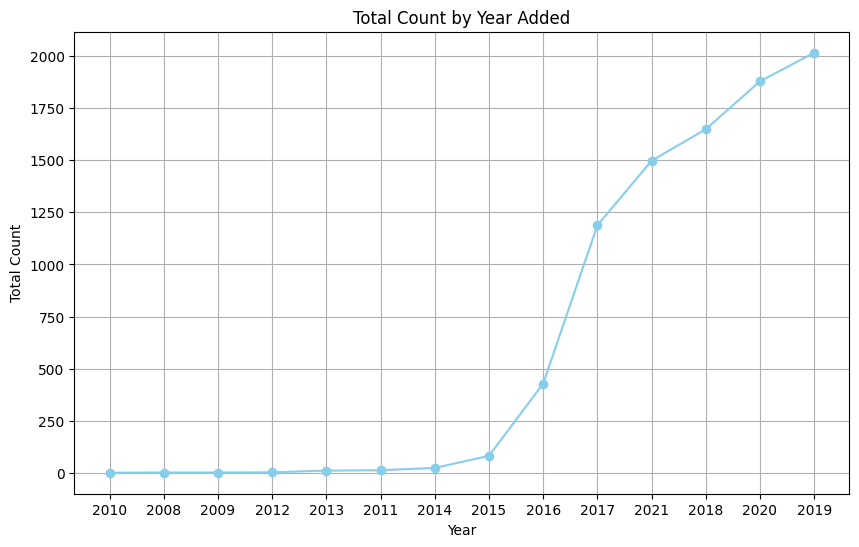

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(year_added['Year'], year_added['Total Count'], marker='o', color='skyblue')
plt.title('Total Count by Year Added')
plt.xlabel('Year')
plt.ylabel('Total Count')
plt.grid()
plt.show()

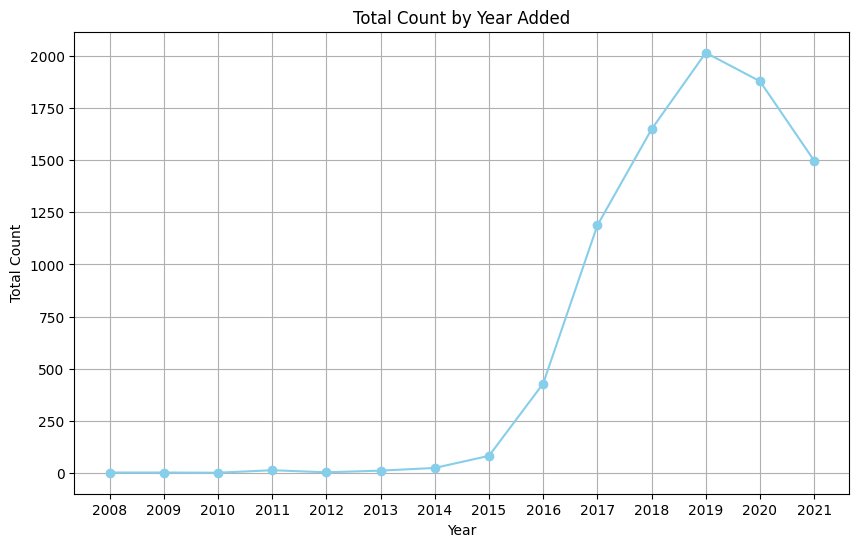

In [ ]:
# Ensure 'Year' column in year_added is of type int
year_added['Year'] = year_added['Year'].astype(int)

# Create a DataFrame for all years from 2008 to 2021
all_years = pd.DataFrame({'Year': range(2008, 2022)})

# Merge the DataFrames and fill missing values with 0
year_added = all_years.merge(year_added, on='Year', how='left').fillna(0)

# Plot the total count by year
plt.figure(figsize=(10, 6))
plt.plot(year_added['Year'], year_added['Total Count'], marker='o', color='skyblue')

# Set the title and labels
plt.title('Total Count by Year Added')
plt.xlabel('Year')
plt.ylabel('Total Count')

# Set x-axis ticks to be continuous from 2008 to 2021
plt.xticks(ticks=range(2008, 2022), labels=range(2008, 2022))

plt.grid()
plt.show()

###Amount of Movie Content as a function of Time

In [ ]:
movies_df = df[df.type.str.contains("Movie")]
movies_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,genre
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,No cast specified,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",Documentaries
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",Country not specified,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...,Children & Family Movies
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...","Dramas, Independent Movies, International Movies"
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...,"Comedies, Dramas"
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic","September 23, 2021",2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...,"Dramas, International Movies"


In [ ]:
df = df.dropna(subset=['date_added'])
year_added = df['date_added'].str.split(',').str[1].str.strip()
movies_df['year_added'] = year_added.loc[movies_df.index]
movies_df.head()

<ipython-input-153-f23711050d77>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,genre,year_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,No cast specified,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",Documentaries,2021
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",Country not specified,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...,Children & Family Movies,2021
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...","Dramas, Independent Movies, International Movies",2021
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...,"Comedies, Dramas",2021
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic","September 23, 2021",2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...,"Dramas, International Movies",2021


In [ ]:
movies_df.shape

(6131, 14)

In [ ]:
# Grouping by 'year_added' and count the number of movies released each year
movies_per_year = movies_df.groupby('year_added').size().reset_index(name='Total Movies')
movies_per_year.tail()

,year_added,Total Movies
9,2017,839
10,2018,1237
11,2019,1424
12,2020,1284
13,2021,993


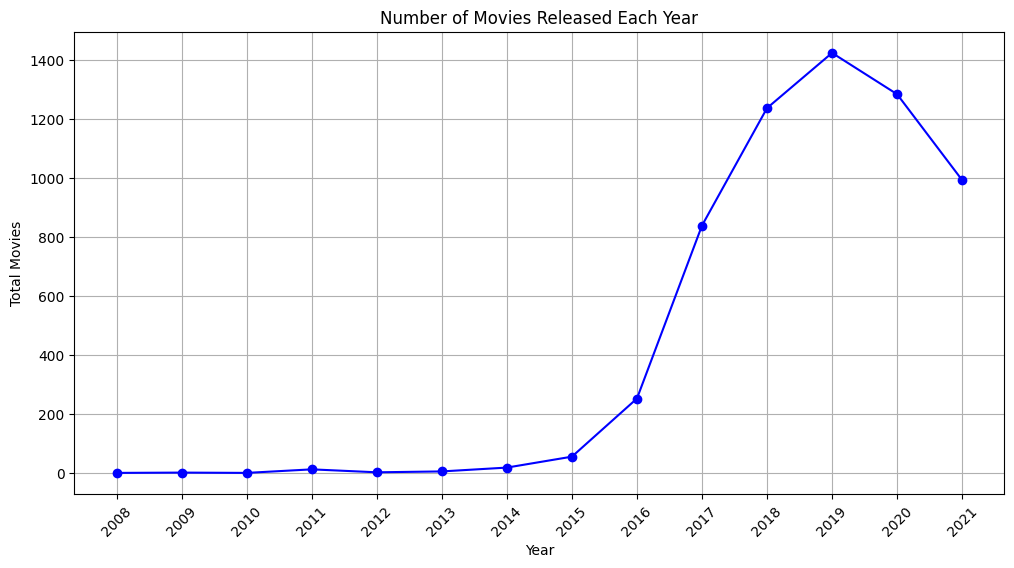

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(movies_per_year['year_added'], movies_per_year['Total Movies'], marker='o', linestyle='-', color='b')
plt.title('Number of Movies Released Each Year')
plt.xlabel('Year')
plt.ylabel('Total Movies')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid()

###Amount of TV Show Content as a function of Time

In [ ]:
shows_df = df[df.type.str.contains("TV Show")]
shows_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,genre
1,s2,TV Show,Blood & Water,Director not specified,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...","International TV Shows, TV Dramas, TV Mysteries"
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Country not specified,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,"Crime TV Shows, International TV Shows, TV Act..."
3,s4,TV Show,Jailbirds New Orleans,Director not specified,No cast specified,Country not specified,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...","Docuseries, Reality TV"
4,s5,TV Show,Kota Factory,Director not specified,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,"International TV Shows, Romantic TV Shows, TV ..."
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",Country not specified,"September 24, 2021",2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...,"TV Dramas, TV Horror, TV Mysteries"


In [ ]:
df = df.dropna(subset=['date_added'])
year_added = df['date_added'].str.split(',').str[1].str.strip()
shows_df['year_added'] = year_added.loc[shows_df.index]
shows_df.head()

<ipython-input-160-aa0fd59a233c>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,genre,year_added
1,s2,TV Show,Blood & Water,Director not specified,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...","International TV Shows, TV Dramas, TV Mysteries",2021
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Country not specified,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,"Crime TV Shows, International TV Shows, TV Act...",2021
3,s4,TV Show,Jailbirds New Orleans,Director not specified,No cast specified,Country not specified,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...","Docuseries, Reality TV",2021
4,s5,TV Show,Kota Factory,Director not specified,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,"International TV Shows, Romantic TV Shows, TV ...",2021
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",Country not specified,"September 24, 2021",2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...,"TV Dramas, TV Horror, TV Mysteries",2021


In [ ]:
shows_df.shape

(2666, 14)

In [ ]:
# Grouping by 'year_added' and count the number of shows released each year
shows_per_year = shows_df.groupby('year_added').size().reset_index(name='Total TV Shows')
shows_per_year.head(10)

,year_added,Total TV Shows
0,2008,1
1,2013,5
2,2014,5
3,2015,26
4,2016,176
5,2017,349
6,2018,412
7,2019,592
8,2020,595
9,2021,505


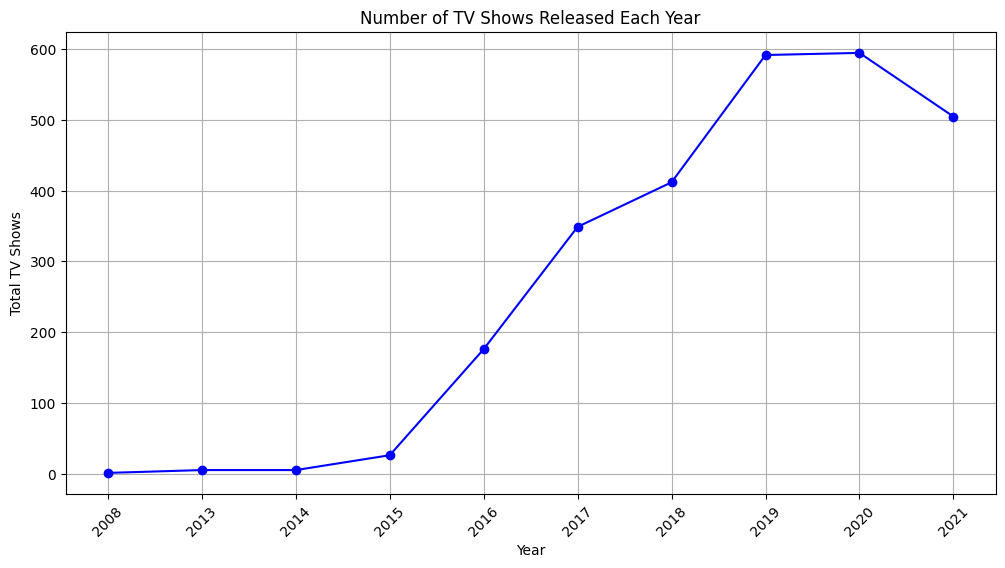

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(shows_per_year['year_added'], shows_per_year['Total TV Shows'], marker='o', linestyle='-', color='b')
plt.title('Number of TV Shows Released Each Year')
plt.xlabel('Year')
plt.ylabel('Total TV Shows')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid()

In [ ]:
df = df.dropna(subset=['date_added'])
date_added = pd.DataFrame()
year_added = df['date_added'].str.split(',').str[1].str.strip()
year_added = year_added.to_frame()
year_added.columns = ['Year']
year_added = year_added.groupby(['Year']).size().reset_index(name='Total Count')
print(year_added.columns)

Index(['Year', 'Total Count'], dtype='object')


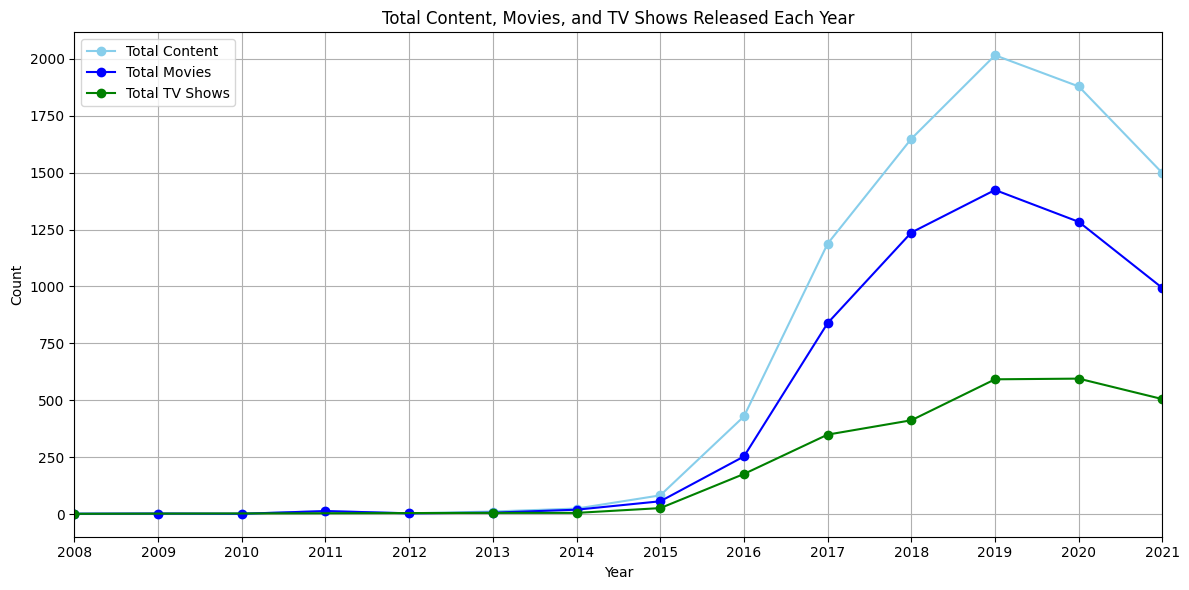

In [ ]:
# Convert the 'year_added' columns to integers, to ensure continuity of data
movies_per_year['year_added'] = movies_per_year['year_added'].astype(int)
shows_per_year['year_added'] = shows_per_year['year_added'].astype(int)
year_added['Year'] = year_added['Year'].astype(int)

# Ensure the data is sorted by year
movies_per_year = movies_per_year.sort_values(by='year_added')
shows_per_year = shows_per_year.sort_values(by='year_added')
year_added = year_added.sort_values(by='Year')

# Create a single figure
plt.figure(figsize=(12, 6))

# Plot for Total Count by Year
plt.plot(year_added['Year'], year_added['Total Count'], marker='o', color='skyblue', label='Total Content')

# Plot for Number of Movies Released Each Year
plt.plot(movies_per_year['year_added'], movies_per_year['Total Movies'], marker='o', linestyle='-', color='b', label='Total Movies')

# Plot for Number of TV Shows Released Each Year
plt.plot(shows_per_year['year_added'], shows_per_year['Total TV Shows'], marker='o', linestyle='-', color='g', label='Total TV Shows')

# Add titles and labels
plt.title('Total Content, Movies, and TV Shows Released Each Year')
plt.xlabel('Year')
plt.ylabel('Count')

# Add legend to differentiate between the lines
plt.legend()

# Set x-axis to be continuous with sorted years
plt.xlim(2008, 2021)  # Set the limits of the x-axis
plt.xticks(range(2008, 2022))  # Set ticks for each year from 2008 to 2021

# Add grid for better readability
plt.grid()

# Show the combined plot
plt.tight_layout()
plt.show()


###Analysis of Movies Based on Duration

In [ ]:
movies_df = df[df.type.str.contains("Movie")]
movies_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,genre
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,No cast specified,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",Documentaries
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",Country not specified,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...,Children & Family Movies
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...","Dramas, Independent Movies, International Movies"
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...,"Comedies, Dramas"
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic","September 23, 2021",2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...,"Dramas, International Movies"


In [ ]:
movies_df['duration'] = movies_df['duration'].apply(lambda x: x.replace(" min", "") if isinstance(x, str) and 'min' in x else x)
movies_df.head()

<ipython-input-96-841afd2dc553>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,genre
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,No cast specified,United States,"September 25, 2021",2020,PG-13,90,Documentaries,"As her father nears the end of his life, filmm...",Documentaries
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",Country not specified,"September 24, 2021",2021,PG,91,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...,Children & Family Movies
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...","Dramas, Independent Movies, International Movies"
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104,"Comedies, Dramas",A woman adjusting to life after a loss contend...,"Comedies, Dramas"
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic","September 23, 2021",2021,TV-MA,127,"Dramas, International Movies",After most of her family is murdered in a terr...,"Dramas, International Movies"


In [ ]:
movies_df.info()
#duration is showing in object format. Need to change duration to int format

<class 'pandas.core.frame.DataFrame'>
Index: 6131 entries, 0 to 8806
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   show_id       6131 non-null   object  
 1   type          6131 non-null   category
 2   title         6131 non-null   object  
 3   director      6131 non-null   category
 4   cast          6131 non-null   category
 5   country       6131 non-null   category
 6   date_added    6131 non-null   object  
 7   release_year  6131 non-null   int64   
 8   rating        6129 non-null   category
 9   duration      6128 non-null   object  
 10  listed_in     6131 non-null   category
 11  description   6131 non-null   object  
 12  genre         6131 non-null   category
dtypes: category(7), int64(1), object(5)
memory usage: 1.1+ MB


In [ ]:
#Converting duration to int64
movies_df['duration'] = pd.to_numeric(movies_df['duration'], errors='coerce')
movies_df = movies_df.dropna(subset=['duration'])
movies_df['duration'] = movies_df['duration'].astype('int64')
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6128 entries, 0 to 8806
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   show_id       6128 non-null   object  
 1   type          6128 non-null   category
 2   title         6128 non-null   object  
 3   director      6128 non-null   category
 4   cast          6128 non-null   category
 5   country       6128 non-null   category
 6   date_added    6128 non-null   object  
 7   release_year  6128 non-null   int64   
 8   rating        6126 non-null   category
 9   duration      6128 non-null   int64   
 10  listed_in     6128 non-null   category
 11  description   6128 non-null   object  
 12  genre         6128 non-null   category
dtypes: category(7), int64(2), object(4)
memory usage: 952.7+ KB


In [ ]:
movies_df.describe()
#describe happens only on numerical data. Only numerical data - release_year and duration

,release_year,duration
count,6128.000000,6128.000000
mean,2013.121084,99.577187
std,9.680300,28.290593
min,1942.000000,3.000000
25%,2012.000000,87.000000
50%,2016.000000,98.000000
75%,2018.000000,114.000000
max,2021.000000,312.000000


In [ ]:
#Shortest Movie
min_duration = np.min(movies_df['duration'])
shortest_movie = movies_df[movies_df['duration'] == min_duration]
shortest_movie

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,genre
3777,s3778,Movie,Silent,"Limbert Fabian, Brandon Oldenburg",No cast specified,United States,"June 4, 2019",2014,TV-Y,3,"Children & Family Movies, Sci-Fi & Fantasy","""Silent"" is an animated short film created by ...","Children & Family Movies, Sci-Fi & Fantasy"


In [ ]:
#Longest Movie
max_duration = np.max(movies_df['duration'])
longest_movie = movies_df[movies_df['duration'] == max_duration]
longest_movie

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,genre
4253,s4254,Movie,Black Mirror: Bandersnatch,Director not specified,"Fionn Whitehead, Will Poulter, Craig Parkinson...",United States,"December 28, 2018",2018,TV-MA,312,"Dramas, International Movies, Sci-Fi & Fantasy","In 1984, a young programmer begins to question...","Dramas, International Movies, Sci-Fi & Fantasy"


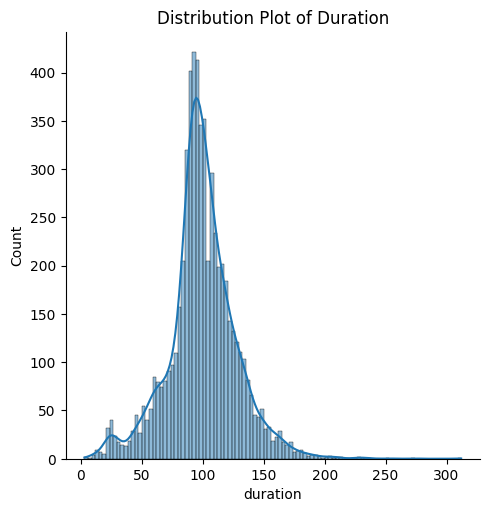

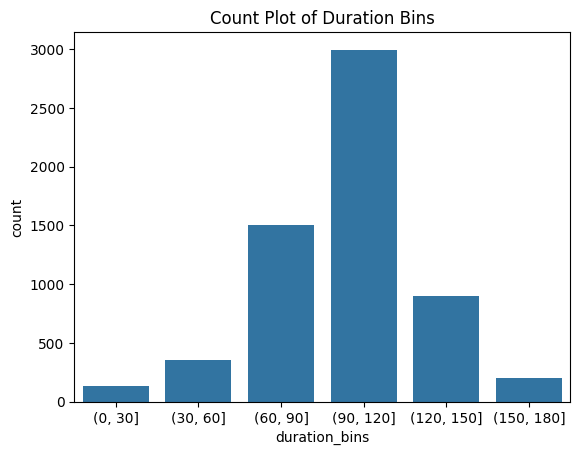

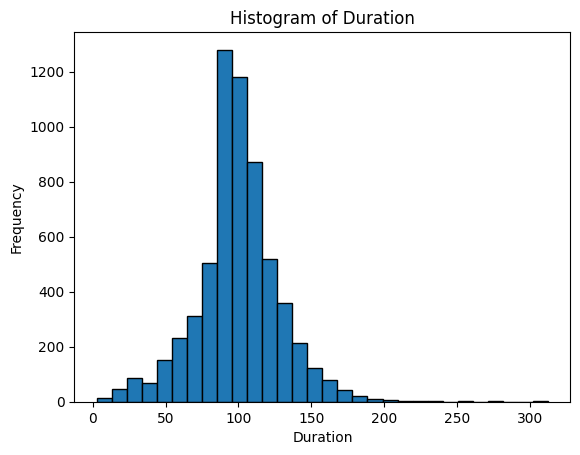

In [ ]:
# Distplot
sns.displot(movies_df['duration'], kde=True)
plt.title('Distribution Plot of Duration')
plt.show()

# Countplot (after binning the continuous variable)
bins = [0, 30, 60, 90, 120, 150, 180]
movies_df['duration_bins'] = pd.cut(movies_df['duration'], bins=bins)
sns.countplot(x='duration_bins', data=movies_df)
plt.title('Count Plot of Duration Bins')
plt.show()

# Histogram
plt.hist(movies_df['duration'], bins=30, edgecolor='k')
plt.title('Histogram of Duration')
plt.xlabel('Duration')
plt.ylabel('Frequency')
plt.show()

###Analysis of TV Shows based on Duration/Seasons

In [ ]:
shows_df = df[df.type.str.contains("TV Show")]
shows_df['duration'] = shows_df['duration'].apply(lambda x: x.replace(" Season", "") if isinstance(x, str) and 'Season' in x else x)
shows_df.head()

<ipython-input-104-a270893cbb30>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,genre
1,s2,TV Show,Blood & Water,Director not specified,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2s,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...","International TV Shows, TV Dramas, TV Mysteries"
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Country not specified,"September 24, 2021",2021,TV-MA,1,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,"Crime TV Shows, International TV Shows, TV Act..."
3,s4,TV Show,Jailbirds New Orleans,Director not specified,No cast specified,Country not specified,"September 24, 2021",2021,TV-MA,1,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...","Docuseries, Reality TV"
4,s5,TV Show,Kota Factory,Director not specified,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2s,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,"International TV Shows, Romantic TV Shows, TV ..."
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",Country not specified,"September 24, 2021",2021,TV-MA,1,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...,"TV Dramas, TV Horror, TV Mysteries"


In [ ]:
shows_df['duration'] = shows_df['duration'].apply(lambda x: x.replace("s", "") if isinstance(x, str) and 's' in x else x)
shows_df.head()

<ipython-input-105-18957e86f2ee>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,genre
1,s2,TV Show,Blood & Water,Director not specified,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...","International TV Shows, TV Dramas, TV Mysteries"
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Country not specified,"September 24, 2021",2021,TV-MA,1,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,"Crime TV Shows, International TV Shows, TV Act..."
3,s4,TV Show,Jailbirds New Orleans,Director not specified,No cast specified,Country not specified,"September 24, 2021",2021,TV-MA,1,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...","Docuseries, Reality TV"
4,s5,TV Show,Kota Factory,Director not specified,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,"International TV Shows, Romantic TV Shows, TV ..."
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",Country not specified,"September 24, 2021",2021,TV-MA,1,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...,"TV Dramas, TV Horror, TV Mysteries"


In [ ]:
shows_df.info()
#Need to convert object variable into numerical variable

<class 'pandas.core.frame.DataFrame'>
Index: 2666 entries, 1 to 8803
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   show_id       2666 non-null   object  
 1   type          2666 non-null   category
 2   title         2666 non-null   object  
 3   director      2666 non-null   category
 4   cast          2666 non-null   category
 5   country       2666 non-null   category
 6   date_added    2666 non-null   object  
 7   release_year  2666 non-null   int64   
 8   rating        2664 non-null   category
 9   duration      2666 non-null   object  
 10  listed_in     2666 non-null   category
 11  description   2666 non-null   object  
 12  genre         2666 non-null   category
dtypes: category(7), int64(1), object(5)
memory usage: 722.8+ KB


In [ ]:
#Converting duration to int64
shows_df['duration'] = pd.to_numeric(shows_df['duration'], errors='coerce')
shows_df = shows_df.dropna(subset=['duration'])
shows_df['duration'] = shows_df['duration'].astype('int64')
shows_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2666 entries, 1 to 8803
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   show_id       2666 non-null   object  
 1   type          2666 non-null   category
 2   title         2666 non-null   object  
 3   director      2666 non-null   category
 4   cast          2666 non-null   category
 5   country       2666 non-null   category
 6   date_added    2666 non-null   object  
 7   release_year  2666 non-null   int64   
 8   rating        2664 non-null   category
 9   duration      2666 non-null   int64   
 10  listed_in     2666 non-null   category
 11  description   2666 non-null   object  
 12  genre         2666 non-null   category
dtypes: category(7), int64(2), object(4)
memory usage: 722.8+ KB


<ipython-input-107-de64834d1de8>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
shows_df.describe()
#duration and release_year in numerical format
#Min - 1 season
#Max - 17 seasons

,release_year,duration
count,2666.000000,2666.000000
mean,2016.625656,1.751313
std,5.733559,1.550176
min,1925.000000,1.000000
25%,2016.000000,1.000000
50%,2018.000000,1.000000
75%,2020.000000,2.000000
max,2021.000000,17.000000


In [ ]:
shows_df.duration.value_counts()
#1793 shows have 1 season each
# 1 show has 17 seasons

,count
duration,
1,1793
2,421
3,198
4,94
5,64
6,33
7,23
8,17
9,9


In [ ]:
#Finding TV Show with 17 seasons
longest_show = shows_df.loc[shows_df['duration']==17]
longest_show

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,genre
548,s549,TV Show,Grey's Anatomy,Director not specified,"Ellen Pompeo, Sandra Oh, Katherine Heigl, Just...",United States,"July 3, 2021",2020,TV-14,17,"Romantic TV Shows, TV Dramas",Intern (and eventual resident) Meredith Grey f...,"Romantic TV Shows, TV Dramas"


In [ ]:
longest_show.rating

,rating
548,TV-14


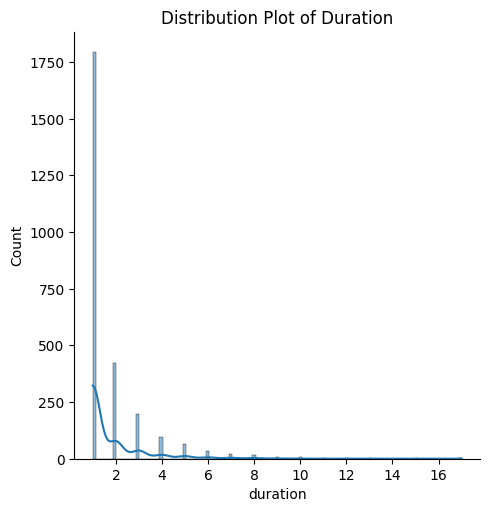

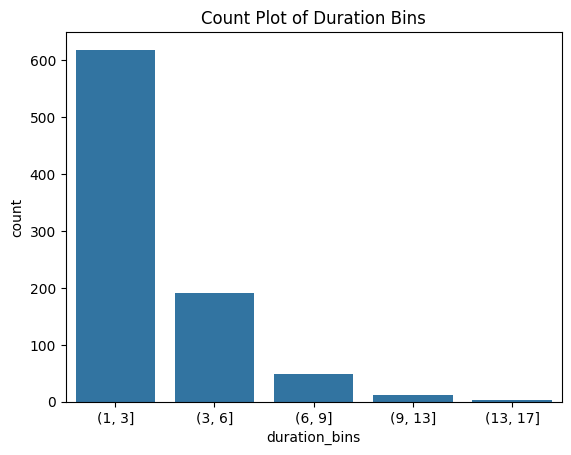

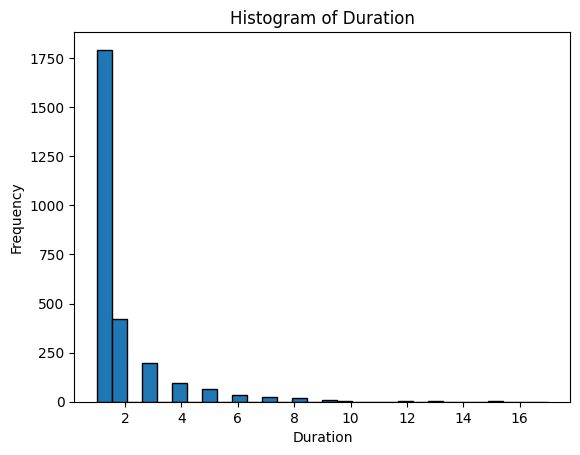

In [ ]:
# Distplot
sns.displot(shows_df['duration'], kde=True)
plt.title('Distribution Plot of Duration')
plt.show()

# Countplot (after binning the continuous variable)
bins = [1, 3, 6, 9, 13, 17]
shows_df['duration_bins'] = pd.cut(shows_df['duration'], bins=bins)
sns.countplot(x='duration_bins', data=shows_df)
plt.title('Count Plot of Duration Bins')
plt.show()

# Histogram
plt.hist(shows_df['duration'], bins=30, edgecolor='k')
plt.title('Histogram of Duration')
plt.xlabel('Duration')
plt.ylabel('Frequency')
plt.show()

###Heat Map to find distribution of releases over months

In [ ]:
netflix_date = df[['date_added']].dropna()
netflix_date['year'] = netflix_date['date_added'].apply(lambda x : x.split(', ')[-1])
netflix_date['month'] = netflix_date['date_added'].apply(lambda x : x.lstrip().split()[0])
month_order = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
new_df = netflix_date.groupby('year')['month'].value_counts().unstack().fillna(0)[month_order]

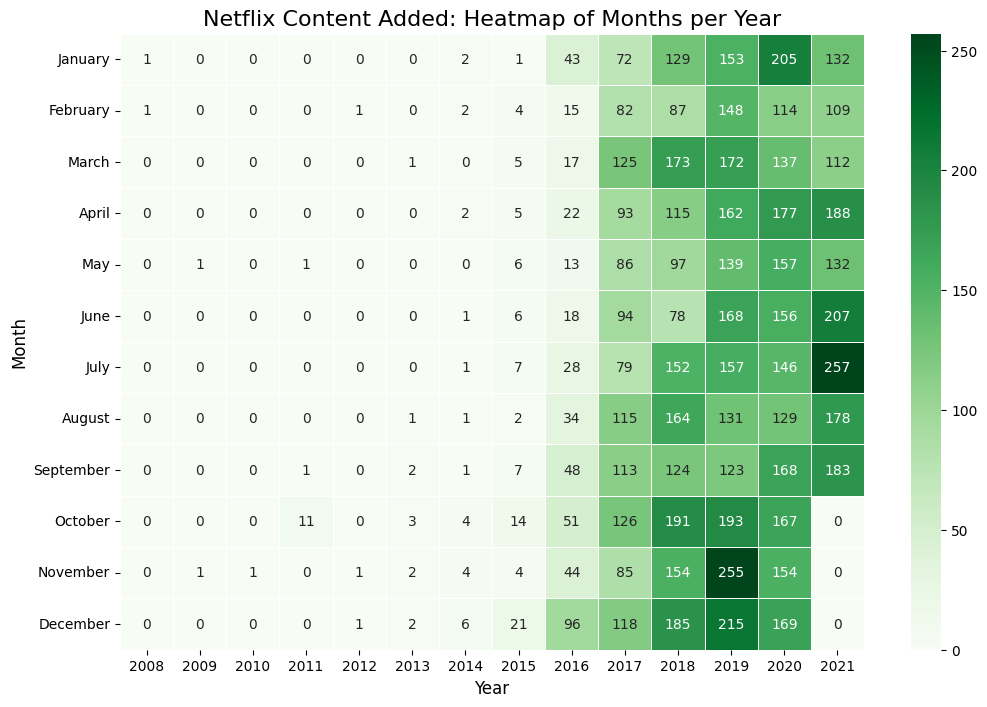

In [ ]:
# Plot the heatmap with year on X-axis and month on Y-axis
plt.figure(figsize=(12, 8))
sns.heatmap(new_df.T, cmap="Greens", linewidths=.5, annot=True, fmt="g")

plt.title("Netflix Content Added: Heatmap of Months per Year", fontsize=16)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Month", fontsize=12)

plt.show()